In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
x = pd.read_csv("Train_X_train.csv",sep=" ",names = [i+1 for i in range(561)])
x = StandardScaler().fit_transform(x)
y = pd.read_csv("Train_y_train.csv",names=['test label'])
x


array([[ 0.04726903, -0.05325364, -0.18793746, ..., -0.69833245,
         0.43079362,  0.00423381],
       [ 0.00707236, -0.01485157, -0.12135729, ..., -0.70527191,
         0.43195135,  0.0197386 ],
       [ 0.01195271, -0.0450759 , -0.04999882, ..., -0.71339714,
         0.43310957,  0.03844022],
       ...,
       [-0.01282282, -0.020785  ,  0.43553762, ..., -0.57659902,
         0.66083999,  0.36193521],
       [ 0.0514986 , -0.03890452, -0.36795979, ..., -0.58845369,
         0.65182283,  0.30627997],
       [ 0.29606029,  0.02457737, -0.69136698, ..., -0.5847016 ,
         0.65307369,  0.34712779]])

In [ ]:
num = 10

In [ ]:
pca = PCA(n_components=num)
lda = LinearDiscriminantAnalysis(n_components=num)
principalComponents = pca.fit_transform(x)
ldaComp = lda.fit_transform(x,y)
principalDfPCA = pd.DataFrame(data = principalComponents
             , columns = [f'principal component {i}' for i in range(1,num+1)])
principalDfPCA = pd.concat([y,principalDfPCA],axis=1)

principalDfLDA = pd.DataFrame(data = ldaComp
             , columns = [f'principal component {i}' for i in range(1,num+1)])
principalDfLDA = pd.concat([y,principalDfLDA],axis=1)
principalDfPCA


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,test label,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,5,-16.377207,2.362095,3.081040,0.845241,7.081026,2.037580,-0.509736,-2.909093,-6.086728,-2.866434
1,5,-15.507294,2.014159,-0.701467,2.661067,4.623278,0.339759,0.354868,0.297573,-1.196149,-0.363032
2,5,-15.358292,3.141507,-1.503304,3.200078,4.345000,0.171058,1.052733,0.336887,-0.722377,-0.757794
3,5,-15.602822,4.475094,-0.958896,2.055221,3.575811,-0.310382,1.401211,0.151301,-1.212786,-1.702403
4,5,-15.772433,4.952421,-1.028270,2.277516,3.773361,-0.520293,1.166233,1.618464,0.386116,0.736045
...,...,...,...,...,...,...,...,...,...,...,...
7762,2,14.644918,-10.812529,-2.096191,3.515930,-0.594303,-0.817049,-4.817511,1.886743,2.436445,1.886929
7763,2,13.416917,-8.858111,-0.965879,2.789631,0.684572,-1.690442,-5.222010,0.654011,-0.459058,1.510393
7764,2,13.453921,-10.862195,-0.191017,4.028154,-0.931254,-1.893406,-5.737805,2.660922,-1.383866,-0.282968
7765,2,11.990697,-12.458353,-1.842226,4.903363,-2.652785,-1.578952,-5.742708,3.360481,-0.366608,0.082573


Text(0.5, 1.0, 'PCA/LDA ratio')

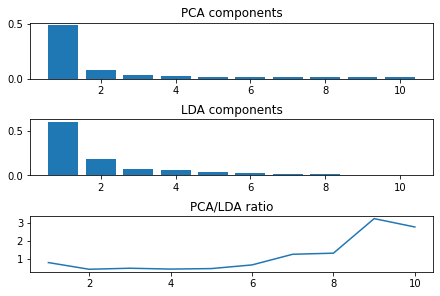

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_lda = lda.explained_variance_ratio_
import matplotlib.pyplot as plt
%matplotlib inline
x = [i+1 for i in range(num)]
fig, ax = plt.subplots(3,1,constrained_layout=True)
ax[0].bar(x,exp_var_pca)
ax[0].set_title("PCA components")
ax[1].bar(x,exp_var_lda)
ax[1].set_title("LDA components")
ax[2].plot(x,exp_var_pca/exp_var_lda)
ax[2].set_title("PCA/LDA ratio")

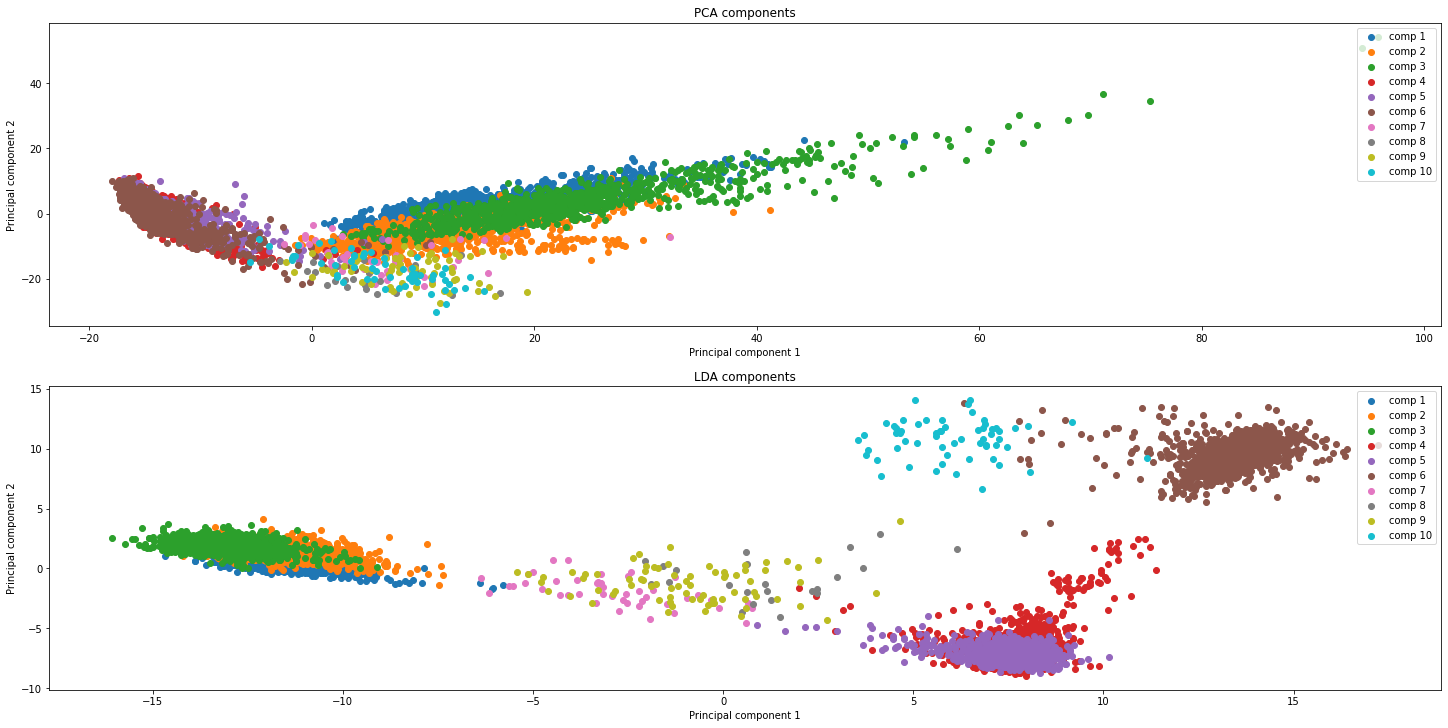

In [ ]:
components_to_2d_visualisation=(1,2)
def visualise_2d(data, components,comp_num,axis,title):
  data_2d = []
  for i in range(comp_num):
    my_data = data[data['test label'] == i+1]
    data_2d.append([my_data[f'principal component {i}'] for i in components_to_2d_visualisation]) 
  for i in range(num):
    axis.scatter(data_2d[i][0],data_2d[i][1], label=f'comp {i+1}')
  axis.set_xlabel(f'Principal component {components_to_2d_visualisation[0]}')
  axis.set_ylabel(f'Principal component {components_to_2d_visualisation[1]}')
  axis.set_title(title)
  axis.legend(loc=1)
fig,ax = plt.subplots(2,1,figsize=(20,10),constrained_layout=True)
visualise_2d(principalDfPCA,components_to_2d_visualisation,num,ax[0],"PCA components")
visualise_2d(principalDfLDA,components_to_2d_visualisation,num,ax[1],"LDA components")
  

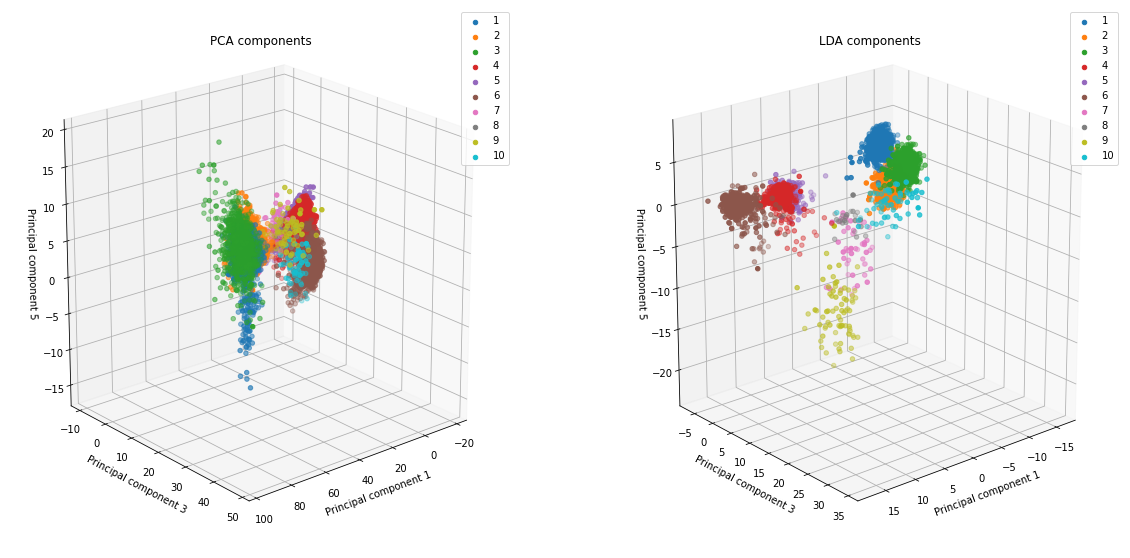

In [ ]:

components_to_3d_visualisation=(1,3,5)
def visualise_3d(data,comp_num,components,axis,title,view):
  data_3d = []
  for i in range(comp_num):
    mydata = data[data['test label'] == i+1]
    data_3d.append([mydata[f'principal component {i}'] for i in components]) 
  for i in range(comp_num):
    axis.scatter(data_3d[i][0],data_3d[i][1],data_3d[i][2], label=f'{i+1}')
  axis.set_xlabel(f'Principal component {components[0]}')
  axis.set_ylabel(f'Principal component {components[1]}')
  axis.set_zlabel(f'Principal component {components[2]}')
  axis.view_init(view[0],view[1])
  axis.set_title(title)
  axis.legend(loc=1)
# fig,ax = plt.subplots(2,1,figsize=(10,10),constrained_layout=True)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
visualise_3d(principalDfPCA,num,components_to_3d_visualisation,ax1,"PCA components",(20,50))
visualise_3d(principalDfLDA,num,components_to_3d_visualisation,ax2,"LDA components",(20,50))

In [ ]:
def eukl_distance(X,X_train):
    N1,M = X.shape
    N2,M = X_train.shape 
    dists = np.zeros([N1,N2])
    for i in range(N1):
      for j in range(N2):
        dists[i,j] = np.sqrt(sum([(X[i][l]-X_train[j][l])**2 for l in range(M)]))
    return dists

def sort_train_labels_knn(Dist, y):
   return y[Dist.argsort(kind='mergesort')]

def p_y_x_knn(y, k):
    yl = len(y)
    pmatr = np.zeros([yl,4])
    for i in range(yl):
        for j in range(k):
            pmatr[i,y[i,j]] += 1
    return pmatr/k

def y_pred(p_y_x):
    R,C = p_y_x.shape
    y = np.zeros([R,1])
    for i in range(R):
        bi = 0
        maxi = 0
        for j in range(C):
            if p_y_x[i, j] >= maxi:
                bi = j
                maxi = p_y_x[i, j]
        y[i] = bi
    return y

def classification_error(p_y_x, y_true):
    return np.sum(y_pred(p_y_x)!= y_true)/len(y_true)


def model_selection_knn(Xval, Xtrain, yval, ytrain, k_values):
    errors = []
    srted_et = sort_train_labels_knn(eukl_distance(Xval,Xtrain),ytrain)
    best_k = 0
    min_er = 1
    for k in k_values:
        print(k)
        er = classification_error(p_y_x_knn(srted_et,k),yval)
        errors.append(er)
        if er < min_er:
            best_k = k
            min_er = er
    return min_er,best_k,errors

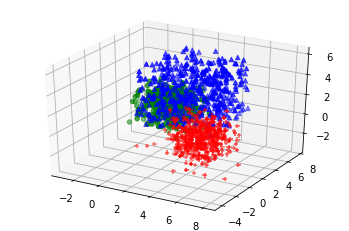

In [ ]:
import numpy.random as rd
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

n = 500
x = []
y = []
z = []
x.append(6 * rd.rand(n) )
y.append(6 * rd.rand(n) )
z.append(6 * rd.rand(n) )

x.append(rd.randn(n) + 5)
y.append(rd.randn(n))
z.append(rd.randn(n))

x.append(rd.randn(n))
y.append(rd.randn(n) + 5)
z.append(rd.randn(n))
colors = ['b','r','g']
markers = ['^','+','o']
for i in range(3):
  ax.scatter(x[i],y[i],z[i], c=colors[i], marker = markers[i])




In [ ]:
knn_data = np.zeros([1500,4])
inds = [i for i in range(1500)]
rd.shuffle(inds)
for i in range(500):
  for j in range(3):
    knn_data[i+500*j,0] = x[j][i]
    knn_data[i+500*j,1] = y[j][i]
    knn_data[i+500*j,2] = z[j][i]
    knn_data[i+500*j,3] = j
knn_data = np.array([knn_data[el] for el in inds])
columns = np.hsplit(knn_data,4)
knn_x = np.hstack(columns[:3])
knn_y = columns[3].astype(int)

print(knn_x)
print(knn_y)

[[-0.52469501  3.73099611 -1.08944705]
 [ 2.94282259  0.31935178  4.87065878]
 [ 0.34406838  4.82036645 -1.01494517]
 ...
 [ 0.17402926  4.80500339 -0.72325632]
 [ 2.1800077   4.17965954  5.92526604]
 [ 5.90938127  3.44017485  1.57734105]]
[[2]
 [0]
 [2]
 ...
 [2]
 [0]
 [0]]


In [ ]:
train_x = knn_x[:500]
val_x = knn_x[500:800]
train_y = knn_y[:500]
val_y = knn_y[500:800]
test_x = knn_x[800:]
test_y = knn_y[800:]
k_vals = [i for i in range(5,30,5)]
min_err, best_k, errs = model_selection_knn(val_x,train_x,val_y,train_y, k_vals)

print(min_err, best_k)


5
10
15
20
25
0.06666666666666667 10


In [ ]:
prob = p_y_x_knn(sort_train_labels_knn(eukl_distance(test_x,train_x),train_y),best_k)
pred = y_pred(prob)
print(pred)
err = classification_error(prob,test_y)
print(err)

In [ ]:
print(err*len(test_y))

32.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nb = KNeighborsClassifier(n_neighbors=best_k)
nb.fit(train_x,train_y)
pred = nb.predict(test_x)
print(sum([1 for i in range(len(test_y)) if pred[i] != test_y[i][0]]))

29


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
comp_met = ["PCA","LDA"]
names = ["KNN", "SVC","Decission Tree", "Random Forest", "Neural Network MLP", "Ada Boost"]
models = []
trainX_PCA = principalDfPCA.iloc[:5000,1:]
trainX_LDA = principalDfLDA.iloc[:5000,1:]
trainY_PCA = principalDfPCA.iloc[:5000,:1]
trainY_LDA = principalDfLDA.iloc[:5000,:1]
testX_PCA = principalDfPCA.iloc[5001:,1:]
testX_LDA = principalDfLDA.iloc[5001:,1:]
testY_PCA = principalDfPCA.iloc[5001:,:1]
testY_LDA = principalDfLDA.iloc[5001:,:1]
data = {"PCA":{"train":(trainX_PCA,trainY_PCA),"test":(testX_PCA,testY_PCA)},"LDA":{"train":(trainX_LDA,trainY_LDA),"test":(testX_LDA,testY_LDA)}}
classifiers = [KNeighborsClassifier(20),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=6),
    RandomForestClassifier(max_depth=6, n_estimators=10, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier()]
M = len(comp_met)
L = len(names)

# for j in range(M):
fig = plt.figure(figsize = (200,400),constrained_layout = True)
met = comp_met[0]
train = data[met]['train']
test = data[met]['test']
trainX = train[0]
trainY = train[1]
testX = test[0]
testX.set_index(pd.Index([i for i in range(len(testX))]),inplace=True)
testY = test[1]
comp = (1,2,3)
# init_ax = fig.add_subplot(L+1,1,1,projection='3d')
# init_data = pd.concat([test[1],test[0]],axis=1)
# visualise_3d(init_data,num,comp,init_ax,met,(10,20))
print('PCA')
for i in range(L):
    fig = plt.figure(figsize = (200,400),constrained_layout = True)
    name = names[i]
    clf = classifiers[i]
    cur_ax = fig.add_subplot(L+1,1,i+1,projection ='3d')
    clf.fit(trainX,trainY)
    pred =pd.DataFrame(clf.predict(testX), columns=['test label'])
    pred_data = pd.concat([pred,testX],axis=1)
    print(pred_data)
    visualise_3d(pred_data,num,(1,2,3),cur_ax,name,(10,20))

